<a href="https://colab.research.google.com/github/heidimag/DS1000/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6

In this lab we discuss:

- Least-squares regression fit
- Interpretation of result table (intercept and slope)


## Import required Python libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Load .csv data

In this lab we are going to work with the possum dataset (already studied in previous labs). This dataset consists of morphometric measurements on 46 possums.

In [ ]:
possum = pd.read_csv("possum.csv")
possum.head(10)

,sex,age,headL,skullW,totalL,tailL
0,m,8,94.1,60.4,89.0,36.0
1,f,6,92.5,57.6,91.5,36.5
2,f,6,94.0,60.0,95.5,39.0
3,f,6,93.2,57.1,92.0,38.0
4,f,2,91.5,56.3,85.5,36.0
5,f,1,88.3,54.8,90.5,35.5
6,m,2,95.3,58.2,89.5,36.0
7,f,6,94.8,57.6,91.0,37.0
8,f,9,93.4,56.3,120.4,55.3
9,f,6,91.8,58.0,89.5,37.5


## Simple Linear Regression

**stats.linregress:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

Simple linear regression is a linear regression model with a single explanatory variable. Let's predict `headL` using `age` variable.

In [ ]:
model = stats.linregress(x = possum['age'], y = possum['headL'])

#### Getting the intercept of our model

In [ ]:
model.intercept

90.08288948069242

Interpretation: The intercept 90.0829 is the average head length when the age's possum is zero.

#### Getting the slope of our model

In [ ]:
model.slope

0.5631158455392805

Interpretation: For every increase of one unit in the age, we expect that the head length will increase, on average, 0.5631 units.

#### Pearson correlation coefficient (r):

In [ ]:
model.rvalue

0.4011016610119052

#### Percentage of the variability of the response variable (head length) explained by the regression model. ($R^2$)

In [ ]:
model.rvalue ** 2

0.16088254246650932

### Plotting the fitted line in a scatterplot

**sns.lmplot:** https://seaborn.pydata.org/generated/seaborn.lmplot.html

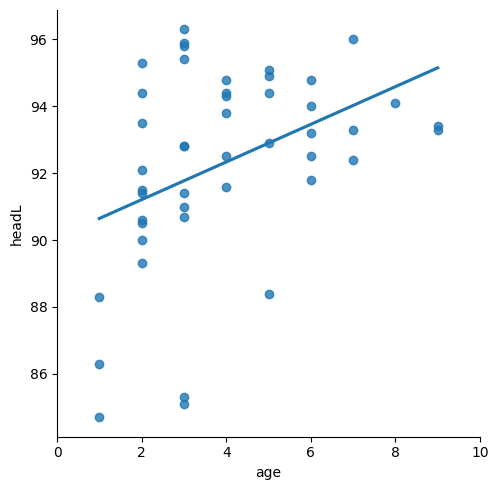

In [ ]:
sns.lmplot(x = "age", y = "headL", data = possum, ci = None)
#ci=None: do not show the confidence interval
plt.xlim(0, 10) #change the range of x axis
plt.show()

#### Plotting two fitted lines, one for female and another for male possums

When we want to plot one fitted line for each category of a categorical variable (such as sex) we can use `hue = "categ_name"`.

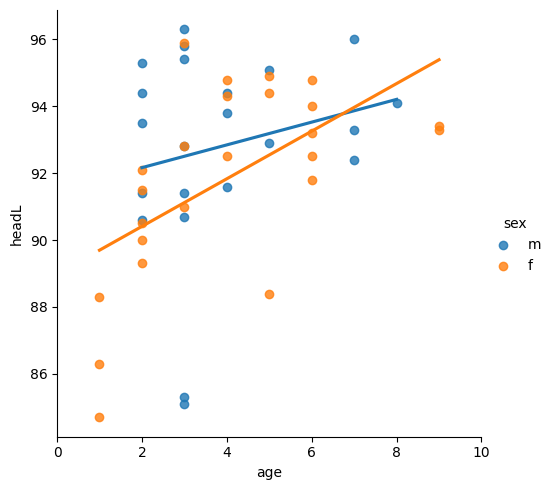

In [ ]:
sns.lmplot(x = "age", y = "headL", data = possum,
           hue = "sex", ci = None)
plt.xlim(0,10)
plt.show()

### Check the effect of an Influential Point

- Now we would like to add an influential point and see how this affects the regression line.
- We decide to add a point that behaves like an outlier to the bottom of the dataframe.
- Let's add a point representing "age" = 9 and "headL" = 86.
- We call the new dataframe `possum_modified`.

In [ ]:
# Original data
possum.tail()

,sex,age,headL,skullW,totalL,tailL
41,m,3,85.3,54.1,77.0,32.0
42,f,2,90.0,55.5,81.0,32.0
43,m,3,85.1,51.5,76.0,35.5
44,m,3,90.7,55.9,81.0,34.0
45,m,2,91.4,54.4,84.0,35.0


#### Create a copy of our original dataset

**pd.DataFrame.copy:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

Some convention in syntax:
- We use `.` to call the functions that are related to an Python object.
- e.g. `possum.head()`, `possum.tail()`
- Therefore, we should not include `.` in a name to define a Python object.
- Instead, we can use some syntax like "_".
- e.g. `possum_modified` means a modfied version of the data frame `possum`. This is simply a candidate way, but not the only way. You can also use other ways such as `possumModfied`. It is good habit to keep a consistent nameing rule of Python objects.

In [ ]:
possum_modified = possum.copy()

#### Add a new observation (outlier) to our DataFrame

In [ ]:
possum_modified.loc[46, 'age'] = 9
possum_modified.loc[46, 'headL'] = 86

In [ ]:
# Now let's look at the last 5 rows of the modified dataframe!
possum_modified.tail()

,sex,age,headL,skullW,totalL,tailL
42,f,2.0,90.0,55.5,81.0,32.0
43,m,3.0,85.1,51.5,76.0,35.5
44,m,3.0,90.7,55.9,81.0,34.0
45,m,2.0,91.4,54.4,84.0,35.0
46,NaN,9.0,86.0,NaN,NaN,NaN


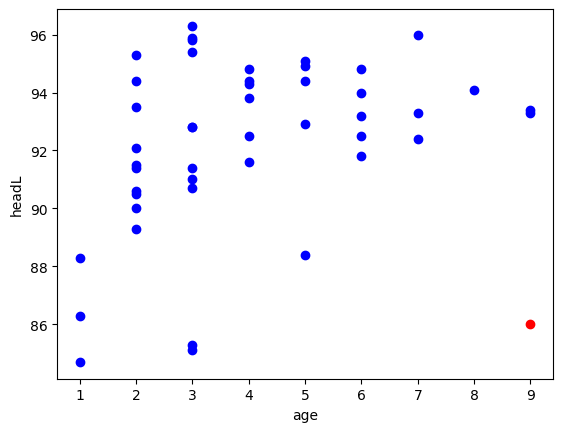

In [ ]:
# The new point that is added to the dataframe is identified
# in red in the scatterplot below.
plt.scatter(possum_modified.loc[0:45, 'age'],
            possum_modified.loc[0:45, 'headL'], color = 'blue')
plt.scatter(possum_modified.loc[46, 'age'],
            possum_modified.loc[46, 'headL'], color = 'red')
plt.xlabel("age")
plt.ylabel("headL")
plt.show()

#### Building a new model using the modified dataframe

In [ ]:
model_modified = stats.linregress(x = possum_modified['age'],
                                  y = possum_modified['headL'])

In [ ]:
# Finding the intercept of the regression line
model_modified.intercept

90.71952206590865

In [ ]:
# Finding the slope of the regression line
model_modified.slope

0.3585469261900172

In [ ]:
# Finding the correlation coefficient (r)
model_modified.rvalue

0.2584020565559145

In [ ]:
# Calculating the R-squared
model_modified.rvalue ** 2

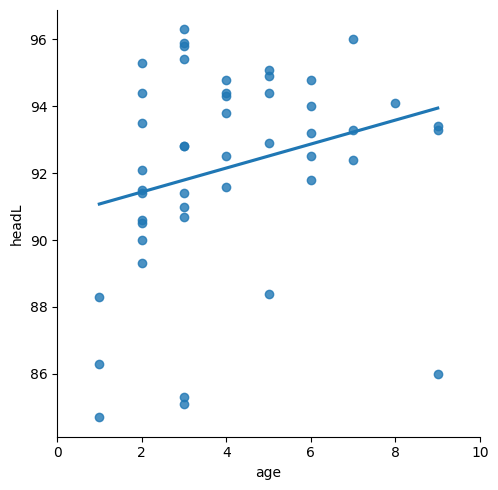

In [ ]:
# Plotting the fitted line for the modified data
sns.lmplot(x = "age", y = "headL", data = possum_modified,
           ci = None)
plt.xlim(0,10)
plt.show()

In [ ]:
# Previous fitted using original data
sns.lmplot(x = "age", y = "headL", data = possum,
           ci = None)
plt.xlim(0,10)
plt.show()

**Can you see the difference between these two fitted lines?**

#### Residual plot

**sns.residplot:** https://seaborn.pydata.org/generated/seaborn.residplot.html

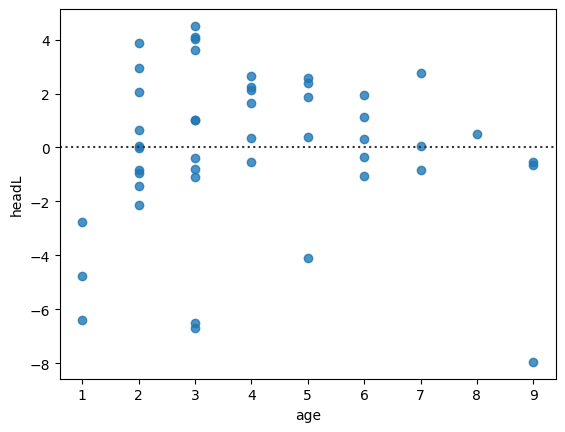

In [ ]:
#draw the residual plot
sns.residplot(x = "age", y = "headL", data = possum_modified)
plt.show()

**Can you find the influential point from this residual plot?**

**Practice: Identifying by the scatterplot if a point is influencial**

In the previous example we added a point that was considerably outside the cloud of points in the original data ans we observed that this new point was influential (as expected) when we computed the new regression line. Now, let's create another dataset from the original data, that is not an influential point.

Step 1: Create another modified dataset by running the code `possum_modified2 = possum.copy()`
Step 2: Add a point with `age = 9 and headL = 94` use the same code in the previous example.
Step 3: Plot the scatterplot using the data `possum_modified2`
Step 4: What can you say about the new point by looking at the scatterplot. Is it an influential point? Why or why not?

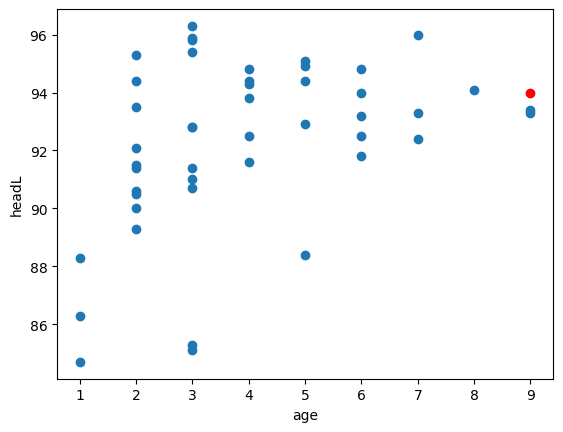

In [ ]:
# your code here
possum_modified2 = possum.copy()
possum_modified2.loc[46, 'age'] = 9
possum_modified2.loc[46, 'headL'] = 94
# plot the scatterplot using possum_modified2
plt.scatter(possum_modified2.loc[0:45, 'age'],
            possum_modified2.loc[0:45, 'headL'])
plt.scatter(possum_modified2.loc[46, 'age'],
            possum_modified2.loc[46, 'headL'], color = 'red')
plt.xlabel("age")
plt.ylabel("headL")
plt.show()
